In [1]:
import numpy as np
import pandas as pd 
import re
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [3]:
df = pd.read_csv("../data/Tweet.csv")
df.head(10)

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
5,550443808606126081,aaplstocknews,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
6,550443809700851716,iknowfirst,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
7,550443857142611968,Cprediction,1420071016,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
8,550443857595600896,iknowfirst_br,1420071017,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
9,550443857692078081,Gold_prediction,1420071017,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [4]:
len(df)

3717964

In [5]:
df = df[["body"]]
df.columns = ["tweets"]

In [6]:
df

,tweets
0,"lx21 made $10,008 on $AAPL -Check it out! htt..."
1,Insanity of today weirdo massive selling. $aap...
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4,Swing Trading: Up To 8.91% Return In 14 Days h...
...,...
3717959,That $SPY $SPX puuump in the last hour was the...
3717960,In 2020 I may start Tweeting out positive news...
3717961,Patiently Waiting for the no twitter sitter tw...
3717962,I don't discriminate. I own both $aapl and $ms...


In [7]:
# create a function to clean the tweets
def cleanTwt(twt):
    twt = re.sub("#aapl", 'aapl', twt) # removes the '#' from apple
    twt = re.sub("#AAPL", 'AAPL', twt)
    twt = re.sub("#amzn", 'amzn', twt) # removes the '#' from amazon
    twt = re.sub("#AMZN", 'AMZN', twt)
    twt = re.sub("#googl", 'googl', twt) # removes the '#' from google
    twt = re.sub("#GOOGL", 'GOOGL', twt)
    twt = re.sub("#msft", 'msft', twt) # removes the '#' from microsoft
    twt = re.sub("#MSFT", 'MSFT', twt)
    twt = re.sub("#tsla", 'tsla', twt) # removes the '#' from tesla
    twt = re.sub("#TSLA", 'TSLA', twt)
    twt = re.sub('#[A-Za-z0-9]+', '', twt) # removes any string with a '#'
    twt = re.sub('\\n', '', twt) # removes the '\n' string
    twt = re.sub('https:\/\/\S+', '', twt) # removes any hyperlinks
    return twt

In [8]:
df["cleaned_tweets"] = df["tweets"].parallel_apply(cleanTwt)
df

,tweets,cleaned_tweets
0,"lx21 made $10,008 on $AAPL -Check it out! htt...","lx21 made $10,008 on $AAPL -Check it out! htt..."
1,Insanity of today weirdo massive selling. $aap...,Insanity of today weirdo massive selling. $aap...
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,S&P100 Performance $HD $LOW $SBUX $TGT $DVN $...
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Swing Trading: Up To 8.91% Return In 14 Days h...
...,...,...
3717959,That $SPY $SPX puuump in the last hour was the...,That $SPY $SPX puuump in the last hour was the...
3717960,In 2020 I may start Tweeting out positive news...,In 2020 I may start Tweeting out positive news...
3717961,Patiently Waiting for the no twitter sitter tw...,Patiently Waiting for the no twitter sitter tw...
3717962,I don't discriminate. I own both $aapl and $ms...,I don't discriminate. I own both $aapl and $ms...


In [9]:
# create a function to get subjectivity
def getSubjectivity(twt):
    return TextBlob(twt).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(twt):
    return TextBlob(twt).sentiment.polarity

# create two new columns called "Subjectivity" & "Polarity"
df['subjectivity'] = df['cleaned_tweets'].parallel_apply(getSubjectivity)
df['polarity'] = df['cleaned_tweets'].parallel_apply(getPolarity)

In [10]:
df.head(5)

,tweets,cleaned_tweets,subjectivity,polarity
0,"lx21 made $10,008 on $AAPL -Check it out! htt...","lx21 made $10,008 on $AAPL -Check it out! htt...",0.0,0.00
1,Insanity of today weirdo massive selling. $aap...,Insanity of today weirdo massive selling. $aap...,1.0,0.00
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,S&P100 Performance $HD $LOW $SBUX $TGT $DVN $...,0.4,0.25
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0.5,0.25
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.00


In [11]:
# create a function get the sentiment text
def getSentiment(score):
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    else:
        return "positive"

In [12]:
# create a column to store the text sentiment
df['sentiment'] = df['polarity'].parallel_apply(getSentiment)

# show the data
df.head()

,tweets,cleaned_tweets,subjectivity,polarity,sentiment
0,"lx21 made $10,008 on $AAPL -Check it out! htt...","lx21 made $10,008 on $AAPL -Check it out! htt...",0.0,0.00,neutral
1,Insanity of today weirdo massive selling. $aap...,Insanity of today weirdo massive selling. $aap...,1.0,0.00,neutral
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,S&P100 Performance $HD $LOW $SBUX $TGT $DVN $...,0.4,0.25,positive
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0.5,0.25,positive
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Swing Trading: Up To 8.91% Return In 14 Days h...,0.0,0.00,neutral


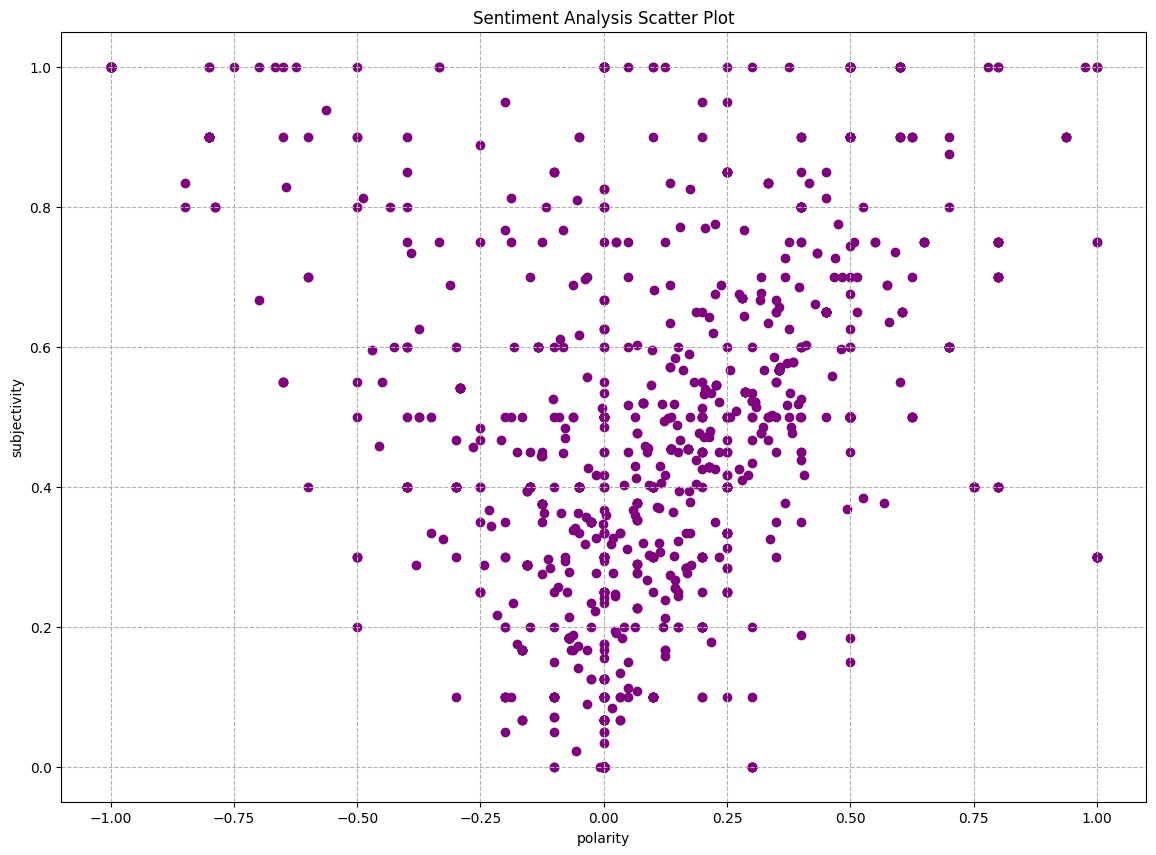

In [17]:
# create a scatter plot to show the subjectivity and the polarity
plt.figure(figsize=(14,10))

for i in range(0, 2000):
    plt.scatter(df["polarity"].iloc[[i]].values[0], df["subjectivity"].iloc[[i]].values[0], color="Purple")

plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.grid(linestyle="--")
plt.show()

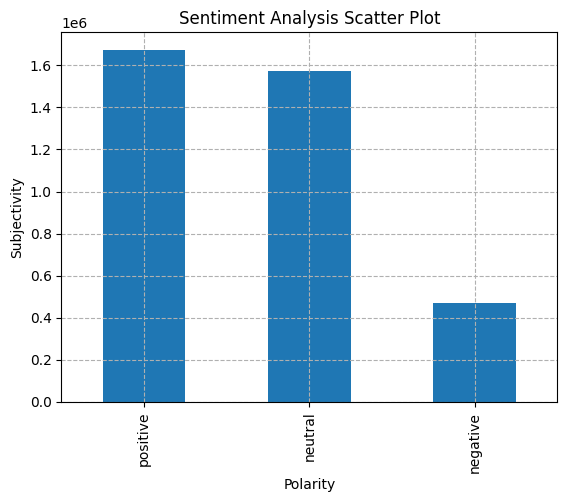

In [16]:
# create a bar chart to show the cout of Positive, Neutral and Negative sentiments
df['sentiment'].value_counts().plot(kind="bar")
plt.title("Sentiment Analysis Scatter Plot")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.grid(linestyle="--")
plt.show()

In [19]:
df.to_csv("../data/data_labeled.csv")